<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Model/Regression_Trees_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(fpath)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [31]:
#Stating X and y values
X = df.drop(columns="PRICE").copy()
y = df["PRICE"].copy()

#Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT
182,0.09103,0.4880,7.155,92.2,17.8,4.82
155,3.53501,0.8710,6.152,82.6,14.7,15.02
280,0.03578,0.4429,7.820,64.5,14.9,3.76
126,0.38735,0.5810,5.613,95.6,19.1,27.26
329,0.06724,0.4600,6.333,17.2,16.9,7.34


# Instantiate Decision Tree

In [33]:
#Instatiating DecisionTree
dec_tree = DecisionTreeRegressor(random_state=42)

# Fit the model using your training data

In [34]:
#Fit training data into our Decision Tree
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# Predict the target values for the training set and the test set

In [35]:
# Make predictions for training and testing data
X_train_pred = dec_tree.predict(X_train)
X_test_pred = dec_tree.predict(X_test)

# Depth of Tree

In [36]:
#Getting depth of tree
dec_tree.get_depth()

20

# Using For Loop to find the Best max_depth

In [37]:
depths = list(range(2,20))
scores = pd.DataFrame(index=depths,columns=["Test Score", "Train Score"])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    # Get predictions 
    train_preds = dec_tree.predict(X_train)
    test_preds = dec_tree.predict(X_test)
    # Calculate score
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)
    # Add scores to dataframe
    scores.loc[depth, "Train Score"] = train_score
    scores.loc[depth, "Test Score"] = test_score
    # Print the results
    print(f"When the depth is {depth}.")
    print(f" - the training r2 score: {train_score.round(3)}.")
    print(f" - the test r2 score: {test_score.round(3)}.")


When the depth is 2.
 - the training r2 score: 0.709.
 - the test r2 score: 0.637.
When the depth is 3.
 - the training r2 score: 0.812.
 - the test r2 score: 0.693.
When the depth is 4.
 - the training r2 score: 0.877.
 - the test r2 score: 0.708.
When the depth is 5.
 - the training r2 score: 0.903.
 - the test r2 score: 0.771.
When the depth is 6.
 - the training r2 score: 0.943.
 - the test r2 score: 0.826.
When the depth is 7.
 - the training r2 score: 0.959.
 - the test r2 score: 0.846.
When the depth is 8.
 - the training r2 score: 0.973.
 - the test r2 score: 0.638.
When the depth is 9.
 - the training r2 score: 0.982.
 - the test r2 score: 0.685.
When the depth is 10.
 - the training r2 score: 0.987.
 - the test r2 score: 0.846.
When the depth is 11.
 - the training r2 score: 0.991.
 - the test r2 score: 0.83.
When the depth is 12.
 - the training r2 score: 0.995.
 - the test r2 score: 0.827.
When the depth is 13.
 - the training r2 score: 0.997.
 - the test r2 score: 0.814.
W

## Visualization of R2 vs max_depth

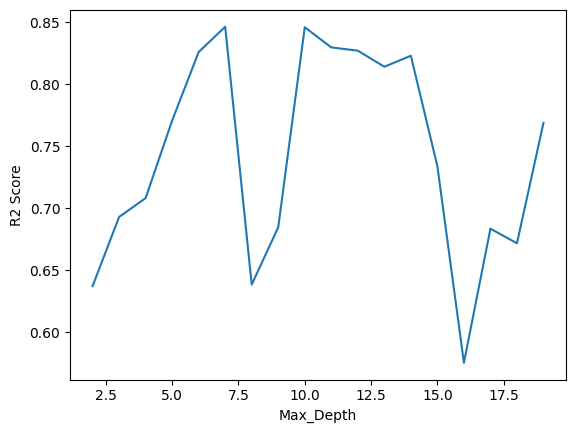

In [38]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores["Test Score"])
plt.xlabel("Max_Depth")
plt.ylabel("R2 Score");

## Sorting Test Data

In [39]:
sorted_scores = scores.sort_values(by="Test Score", ascending=False)
sorted_scores.head()

,Test Score,Train Score
7,0.846377,0.958517
10,0.84601,0.986796
11,0.829736,0.9911
12,0.827102,0.995358
6,0.825985,0.942742
